# Import Library

In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math                           # Use For maths functions.
import seaborn as sns

This data collected from the various website according to our requirements and does not contain unnecessary columns and most of the data does not contain empty values so here we do not require data wrangling and munging

In [2]:
df = pd.read_csv("rubgy_world_cup_20151.csv",encoding = "ISO-8859-1")#becouse normally this file is not running
ef = pd.read_csv("player_record.csv",encoding = "ISO-8859-1")


In [158]:
df.head(1)

,team,name,caps,position,years_since_debut,debut,age,approx_age_debuted,height_cm,weight_kg
0,Australia,Stephen Moore,102.0,Hooker,10.5,11-Jun-05,32,22,186,112


In [157]:
ef.head(1)

,name,team,total,tries,conversions,penalties,drop_goals
0,Nicolas Sanchez,Argentina,97,1,13,20,2


In [ ]:
full = pd.merge(df,ef[['name','total','tries','conversions','penalties','drop_goals']], on='name',how='outer').sort_values(by='total',ascending =False).fillna(0)

# Data Cleansing: Redesign the data into a usable/functional format and correct/remove any bad data !!!

In [160]:
df.position.unique()

array(['Hooker', 'Centre', 'Lock', 'Back Row', 'Scrum Half', 'Wing',
       'Fly Half', 'Prop', 'Full Back', 'Utility Forward', 'Utility Back'],
      dtype=object)

In [174]:
full = full[(full.position!='Utility Forward') & (full.position!='Utility Back')]

here we remove Utility Forward and Utility back position becouse it's not use ful

In [181]:
full.corr(method='pearson', min_periods=1)

,caps,years_since_debut,age,approx_age_debuted,height_cm,weight_kg,total,tries,conversions,penalties,drop_goals
caps,1.000000,0.808575,0.568249,-0.303953,0.075400,0.075763,0.100988,0.076905,0.113012,0.048684,0.066335
years_since_debut,0.808575,1.000000,0.725344,-0.336380,0.072721,0.091343,0.027044,0.000892,0.056029,0.013244,0.026786
age,0.568249,0.725344,1.000000,0.396458,0.059026,0.216530,-0.055143,-0.080126,0.004929,-0.034610,-0.028365
approx_age_debuted,-0.303953,-0.336380,0.396458,1.000000,-0.012127,0.180560,-0.111789,-0.109336,-0.068270,-0.066799,-0.069842
height_cm,0.075400,0.072721,0.059026,-0.012127,1.000000,0.580860,-0.098818,-0.015934,-0.117339,-0.090449,-0.041209
weight_kg,0.075763,0.091343,0.216530,0.180560,0.580860,1.000000,-0.220508,-0.128191,-0.173539,-0.181921,-0.071984
total,0.100988,0.027044,-0.055143,-0.111789,-0.098818,-0.220508,1.000000,0.468092,0.812494,0.874690,0.634567
tries,0.076905,0.000892,-0.080126,-0.109336,-0.015934,-0.128191,0.468092,1.000000,0.028344,0.034640,-0.015679
conversions,0.113012,0.056029,0.004929,-0.068270,-0.117339,-0.173539,0.812494,0.028344,1.000000,0.782208,0.632118
penalties,0.048684,0.013244,-0.034610,-0.066799,-0.090449,-0.181921,0.874690,0.034640,0.782208,1.000000,0.683198


In [182]:
full.describe()

,caps,years_since_debut,age,approx_age_debuted,height_cm,weight_kg,total,tries,conversions,penalties,drop_goals
count,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,32.319315,5.025389,27.749221,22.897196,186.129283,103.093458,3.747664,0.414330,0.297508,0.347352,0.012461
std,25.144622,3.637420,3.732604,2.757267,7.207020,12.766742,10.100673,0.888291,1.602541,1.957242,0.147259
min,0.000000,0.000000,19.000000,18.000000,165.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,2.000000,25.000000,21.000000,181.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,4.300000,28.000000,22.000000,186.000000,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,7.400000,30.000000,24.000000,191.000000,113.000000,5.000000,1.000000,0.000000,0.000000,0.000000
max,148.000000,17.000000,38.000000,34.000000,208.000000,145.000000,97.000000,8.000000,23.000000,23.000000,2.000000


In [183]:
team_sum = full.groupby('team').sum()
team_sum.head(2)

,caps,years_since_debut,age,approx_age_debuted,height_cm,weight_kg,total,tries,conversions,penalties,drop_goals
team,,,,,,,,,,,
Argentina,1024.0,165.1,882,723,6140,3329,250.0,27.0,23.0,21.0,2.0
Australia,1439.0,173.0,902,738,6203,3466,222.0,28.0,17.0,16.0,0.0


In [184]:
team_avg = full.groupby('team').mean()
team_avg.head(2)

,caps,years_since_debut,age,approx_age_debuted,height_cm,weight_kg,total,tries,conversions,penalties,drop_goals
team,,,,,,,,,,,
Argentina,31.030303,5.003030,26.727273,21.909091,186.060606,100.878788,7.575758,0.818182,0.696970,0.636364,0.060606
Australia,43.606061,5.242424,27.333333,22.363636,187.969697,105.030303,6.727273,0.848485,0.515152,0.484848,0.000000


## Analysis on age factor.

In [35]:
age_group = full.sort_values(by=['age']).groupby('age')
age_group.mean()

,caps,years_since_debut,approx_age_debuted,height_cm,weight_kg,total,tries,conversions,penalties,drop_goals
age,,,,,,,,,,
19,10.000000,0.800000,18.000000,175.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20,6.000000,1.120000,19.000000,181.800000,94.200000,1.000000,0.200000,0.000000,0.000000,0.000000
21,11.473684,1.257895,19.789474,186.263158,97.210526,8.052632,0.631579,0.473684,1.210526,0.105263
22,16.500000,1.761538,20.269231,185.076923,96.807692,5.730769,0.769231,0.307692,0.423077,0.000000
23,13.470588,1.673529,21.470588,185.588235,103.558824,1.705882,0.294118,0.029412,0.058824,0.000000
24,18.545455,2.327273,21.927273,186.345455,99.563636,4.400000,0.581818,0.200000,0.345455,0.018182
25,20.418182,2.996364,22.254545,187.218182,101.981818,3.109091,0.454545,0.109091,0.200000,0.000000
26,24.400000,3.456923,22.738462,186.307692,100.938462,4.015385,0.292308,0.400000,0.569231,0.015385
27,29.523810,4.458730,22.761905,184.619048,101.253968,5.253968,0.460317,0.666667,0.507937,0.031746


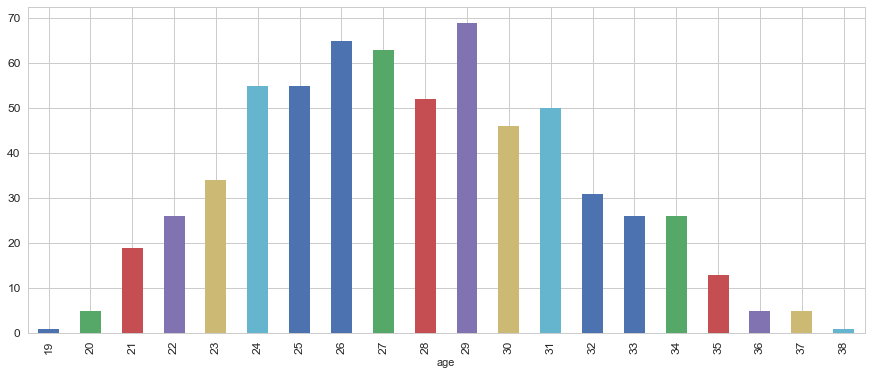

In [68]:
age_group.team.count().plot.bar(figsize=(15,6),fontsize=12)

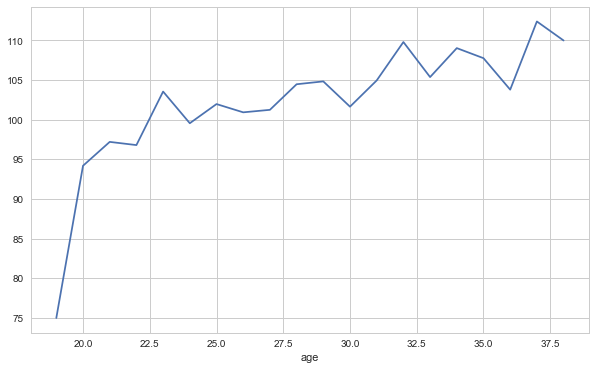

In [69]:
age_group['weight_kg'].mean().plot.line(figsize=(10,6))

weight of player is increses as age

## Analysis on Positions

In [206]:
position_group=full.sort_values(by=['position']).groupby('position').mean()
series_for_position = []
for i in position_group['total']:
    series_for_position.append(i)

series_for_position

([<matplotlib.patches.Wedge at 0x1cca04bc5f8>,
 [Text(1.08682,0.169753,'Back Row'),
  Text(0.920954,0.601535,'Centre'),
  Text(-0.683169,0.862137,'Fly Half'),
  Text(-0.677257,-0.866789,'Full Back'),
  Text(-0.169671,-1.08684,'Hooker'),
  Text(0.00521824,-1.09999,'Lock'),
  Text(0.126142,-1.09274,'prop'),
  Text(0.467931,-0.99551,'Scrum Half'),
  Text(1.00186,-0.454178,'Wing')],
 [Text(1.28443,0.200617,'4.93%'),
  Text(1.0884,0.710905,'8.55%'),
  Text(-0.807382,1.01889,'44.36%'),
  Text(-0.800395,-1.02439,'13.20%'),
  Text(-0.200521,-1.28444,'2.98%'),
  Text(0.00616701,-1.29999,'2.10%'),
  Text(0.149076,-1.29142,'1.41%'),
  Text(0.553009,-1.17651,'8.92%'),
  Text(1.18402,-0.536756,'13.55%')])

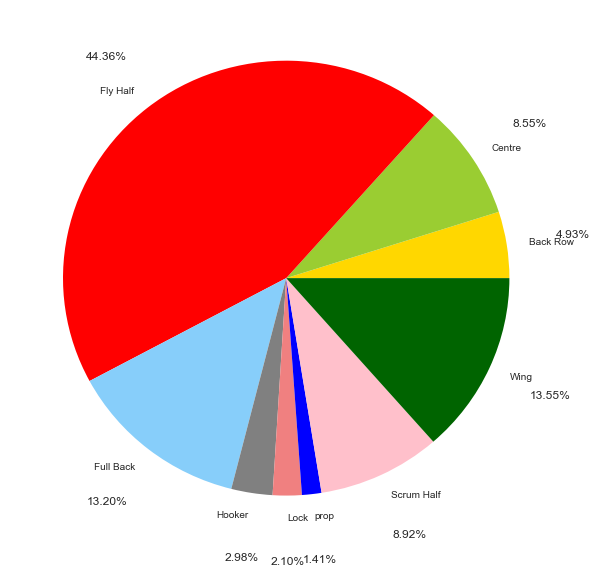

In [225]:

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.despine()
plt.pie(series_for_position, 
        labels=["Back Row","Centre","Fly Half","Full Back","Hooker","Lock","prop","Scrum Half","Wing"],
        colors = ['gold','yellowgreen','red','lightskyblue','gray','lightcoral','blue','pink', 'darkgreen'],
        shadow=False, autopct= '%1.2f%%',pctdistance =1.3, labeldistance =1.1)

Fig:- Total goal score by various positions

As here we can see that the fly half is very important position becouse 44.36% of total point is score by this position


In [227]:
position_group

,caps,years_since_debut,age,approx_age_debuted,height_cm,weight_kg,total,tries,conversions,penalties,drop_goals
position,,,,,,,,,,,
Back Row,35.561983,5.720661,28.388430,22.867769,189.719008,106.842975,2.066116,0.413223,0.000000,0.000000,0.000000
Centre,29.625000,4.300000,26.833333,22.722222,185.500000,98.194444,3.583333,0.527778,0.305556,0.111111,0.000000
Fly Half,32.291667,4.725000,26.666667,22.041667,182.312500,88.895833,18.583333,0.375000,2.812500,3.520833,0.166667
Full Back,35.588235,5.335294,27.264706,21.970588,182.794118,90.088235,5.529412,0.529412,0.382353,0.705882,0.000000
Hooker,35.535714,5.660714,29.142857,23.642857,181.250000,107.071429,1.250000,0.250000,0.000000,0.000000,0.000000
Lock,34.094595,5.252703,28.229730,23.148649,198.243243,115.918919,0.878378,0.175676,0.000000,0.000000,0.000000
Prop,30.327273,4.815455,28.500000,23.890909,184.600000,116.654545,0.590909,0.118182,0.000000,0.000000,0.000000
Scrum Half,32.867925,4.681132,26.811321,22.339623,177.056604,84.264151,3.735849,0.339623,0.396226,0.415094,0.000000
Wing,26.513514,4.497297,26.540541,22.202703,185.229730,94.405405,5.675676,1.135135,0.000000,0.000000,0.000000


## Analysis on Experience

In this plot we can easily understand that the New Zealand team played more matches in compair to other teams 

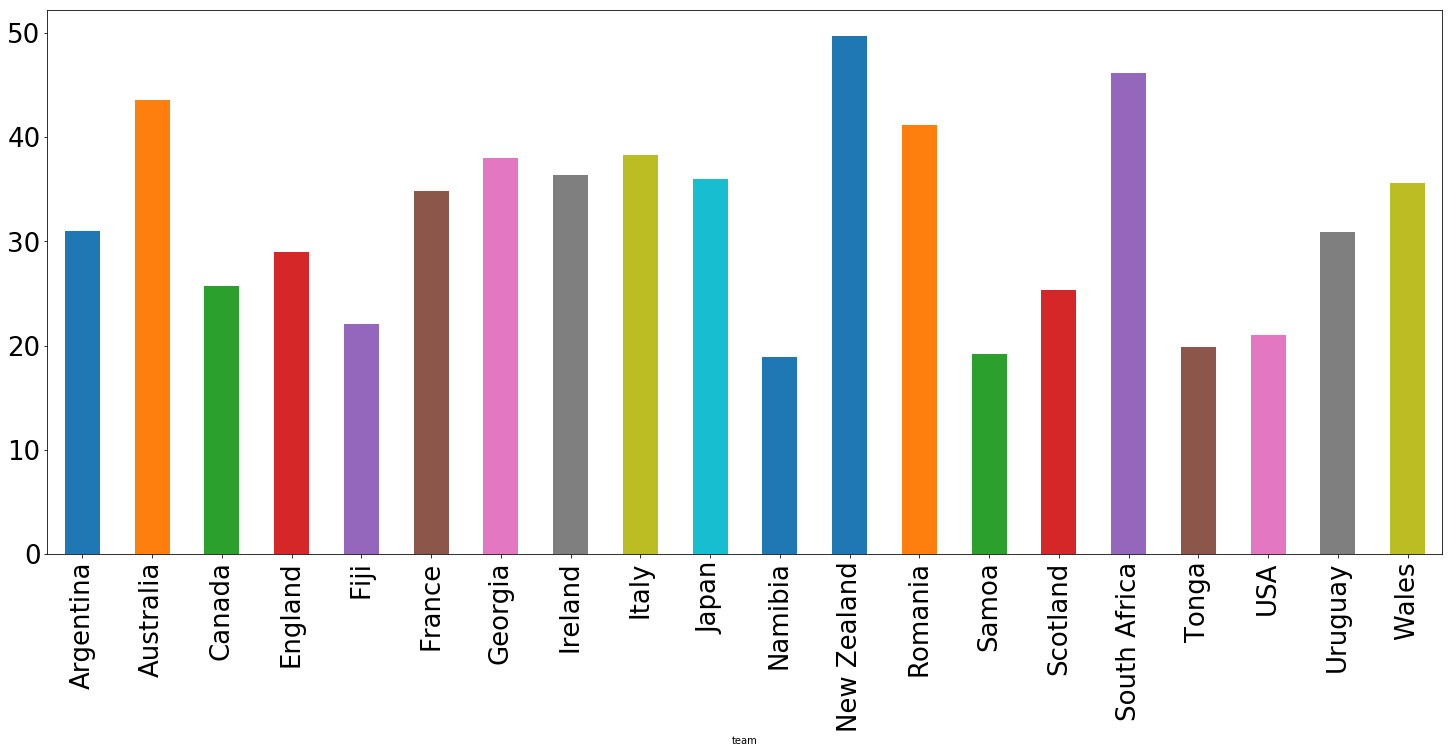

In [13]:
team_avg['caps'].plot.bar(figsize=(25,10),fontsize=26)

### Find age different of various position according to team


(15, 35)

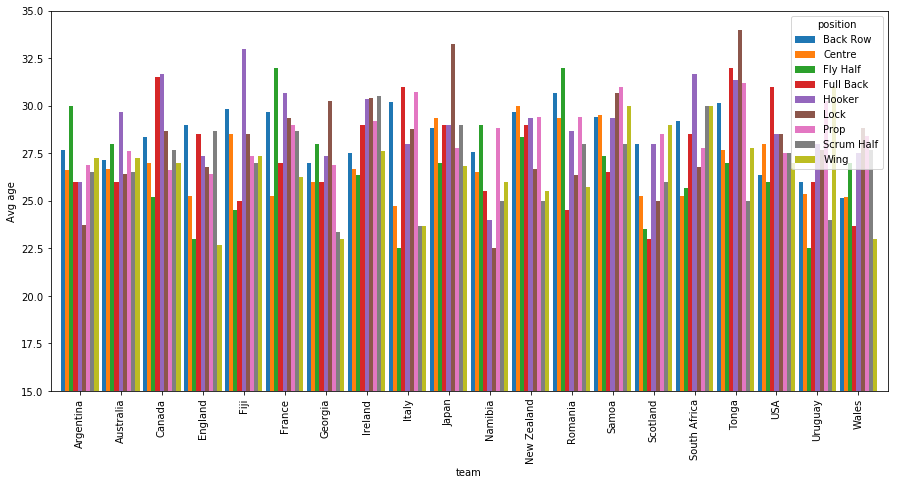

In [14]:
a = full[['team','position','age']][(full.position!= 'Utility Back') & (full.position!= 'Utility Forward')]
fig, ax = plt.subplots(figsize=(15,7)) 
ax.set_ylabel("Avg age") 
a.groupby(['team','position']).mean()['age'].unstack().plot(ax=ax,kind='bar', width=0.92).set_ylim(15,35)


In [15]:
a = full[['team','approx_age_debuted']][(full.position!= 'Utility Back') & (full.position!= 'Utility Forward')].groupby('team')
a.head()

,team,approx_age_debuted
302,Argentina,22
558,South Africa,20
257,New Zealand,21
63,Australia,24
567,Scotland,25
103,Japan,18
170,Wales,19
167,Italy,20
638,New Zealand,22
456,Ireland,23
